Last edited at 26.04

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [322]:
clinical = pd.read_csv('../amp_parkinson/train_clinical_data.csv')
clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [323]:
clinical.isna().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [324]:
clinical.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000


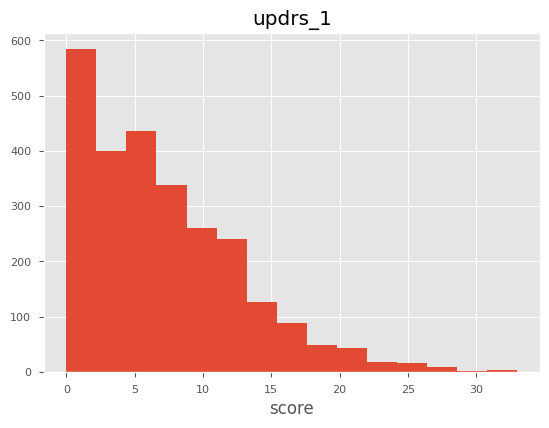

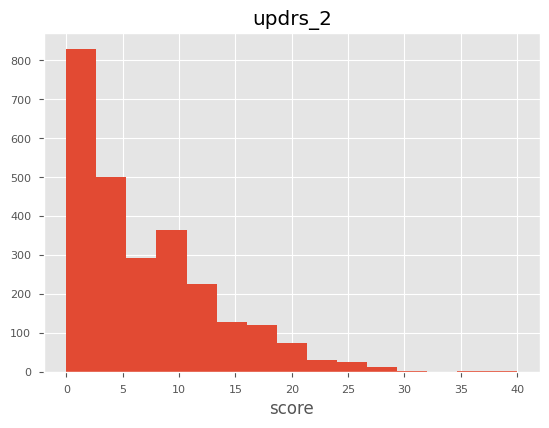

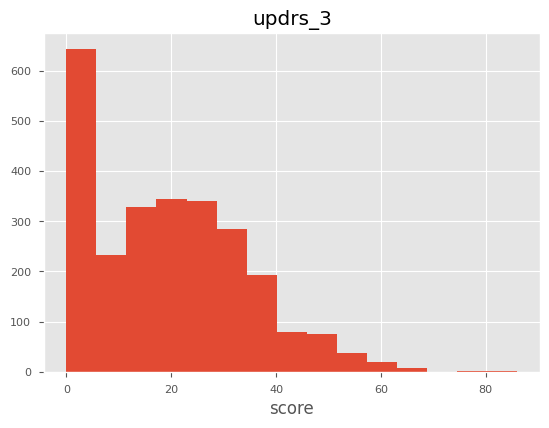

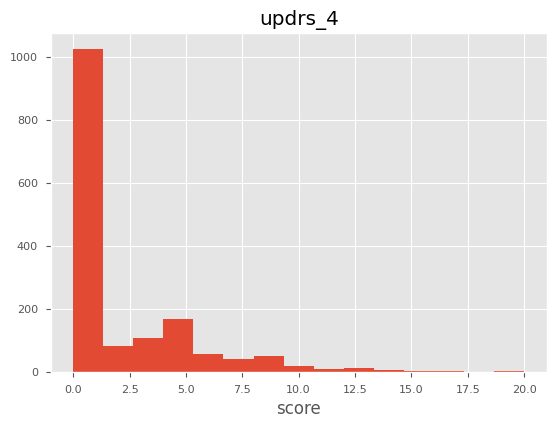

In [325]:
for i in range(1, 5):
    plt.hist(clinical[f'updrs_{i}'], bins=15)
    plt.title(f'updrs_{i}')
    plt.xlabel('score')
    plt.show()

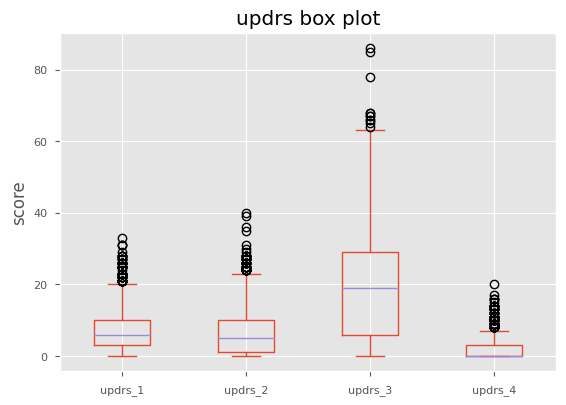

In [326]:
clinical.plot.box(column=['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'])
plt.title('updrs box plot')
plt.ylabel('score')
plt.show()

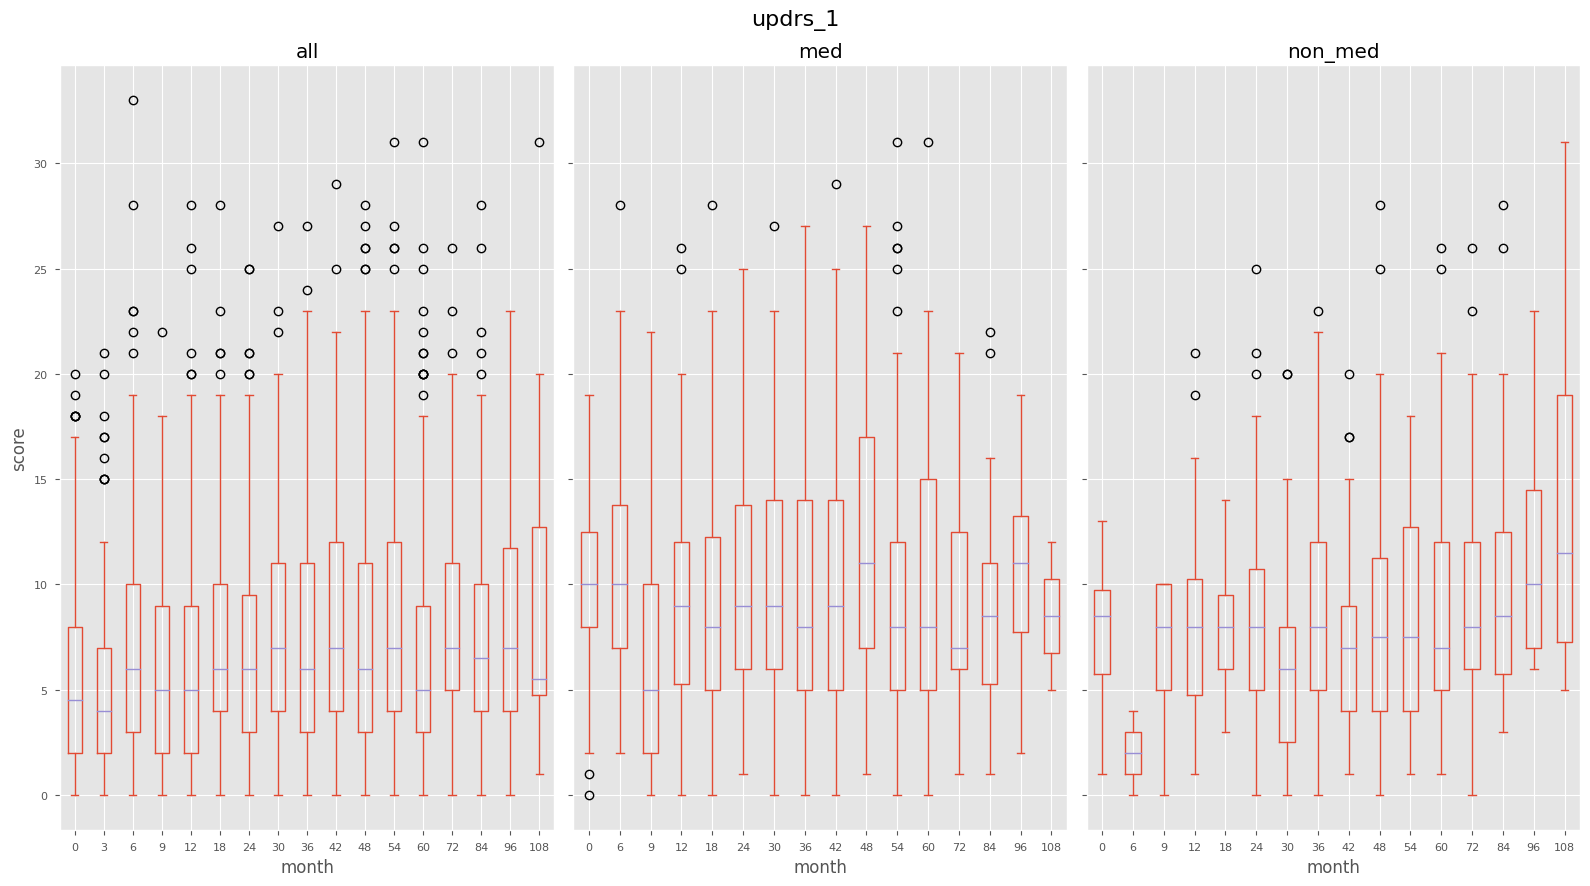

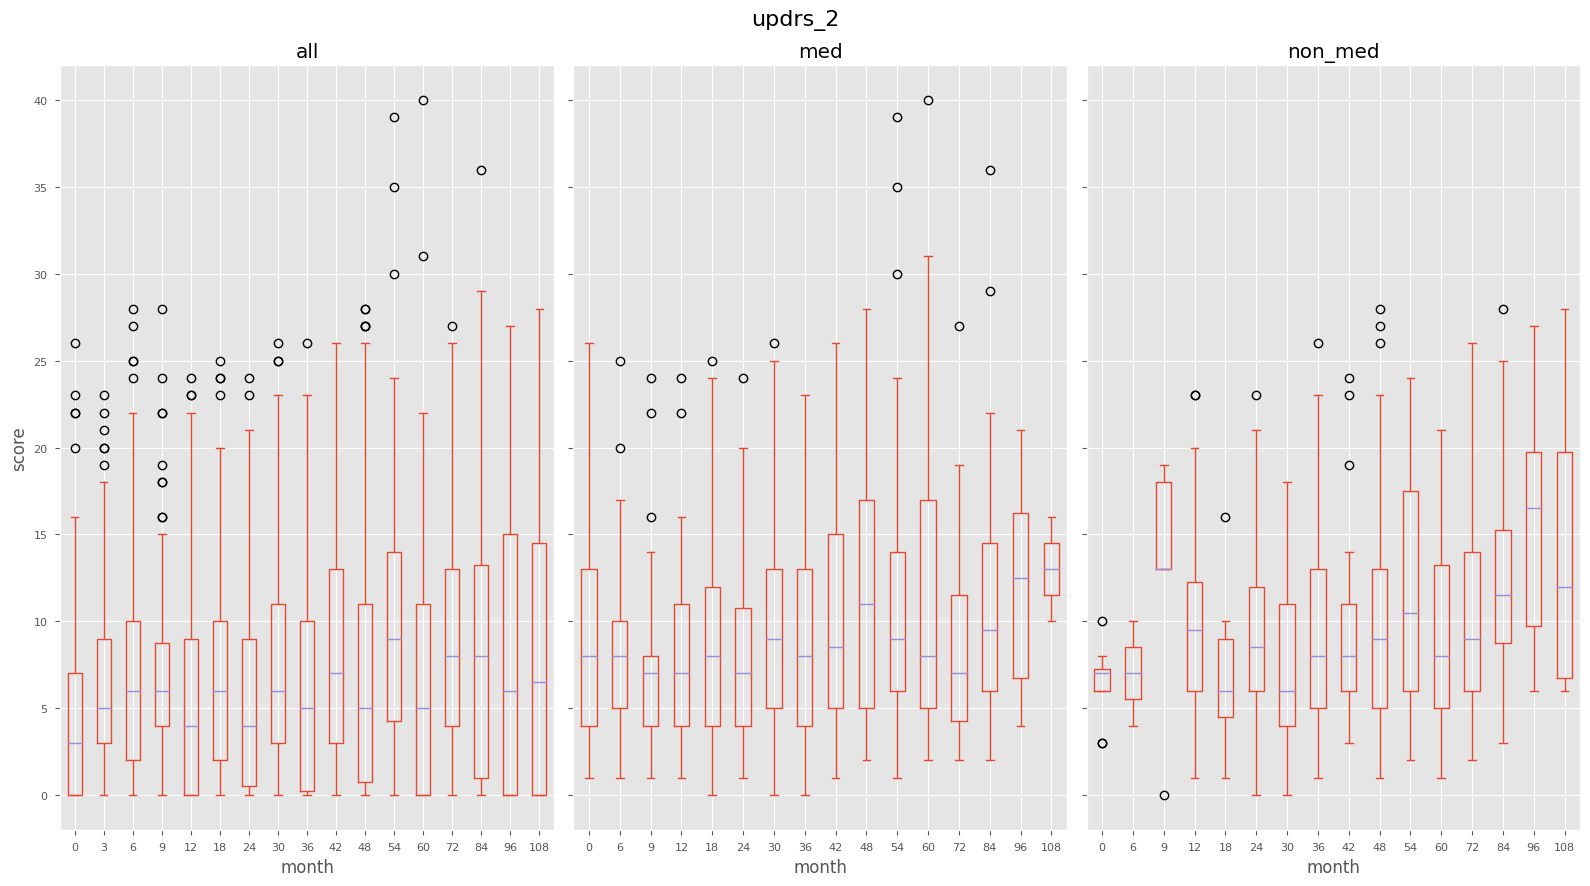

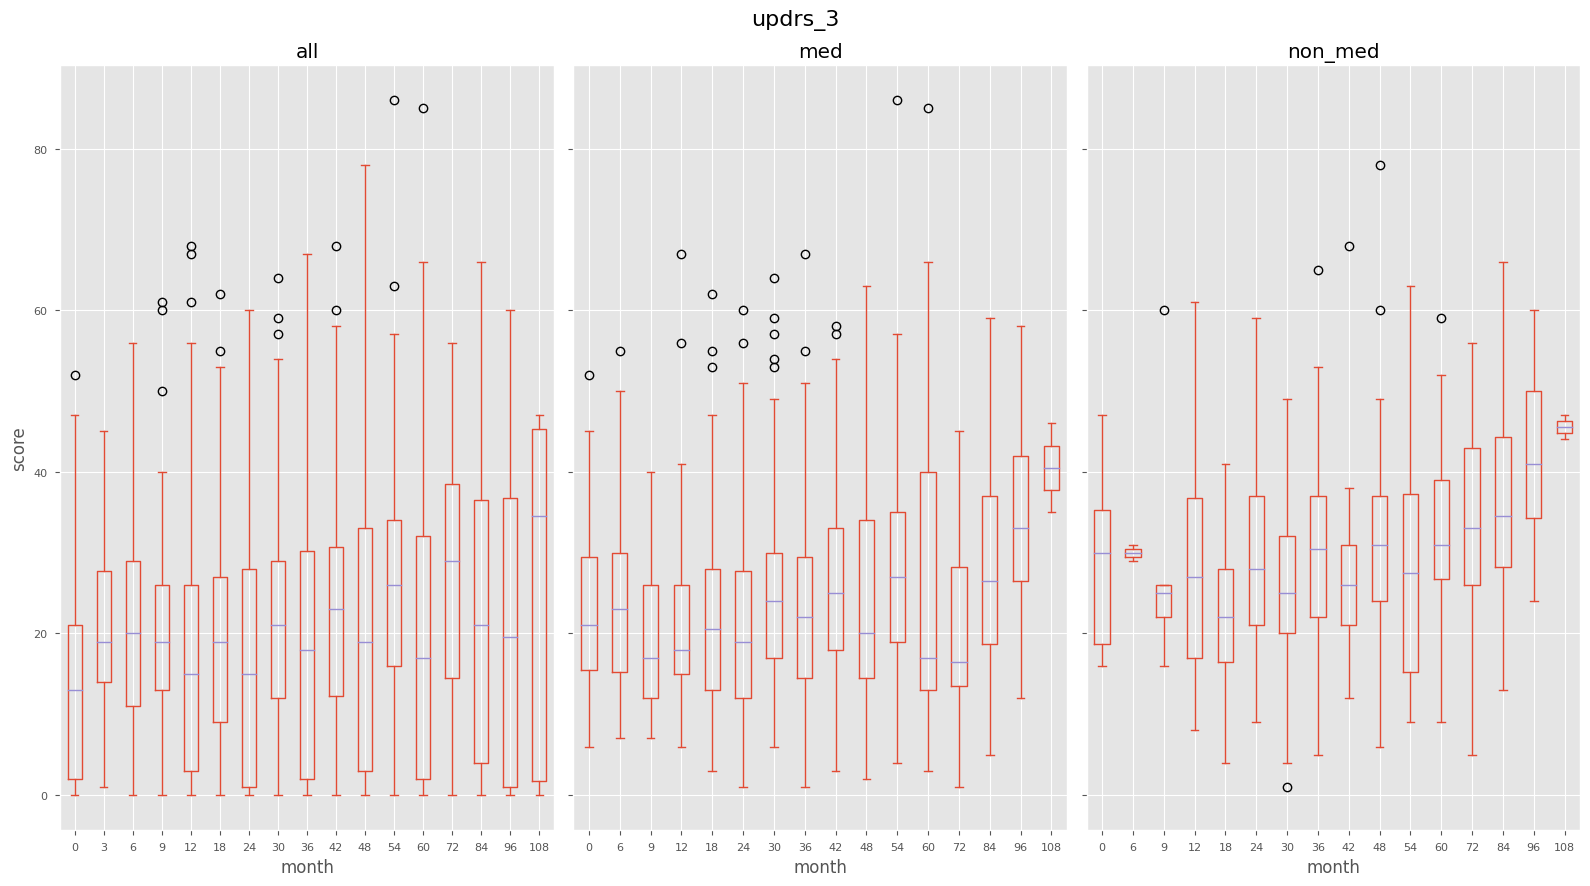

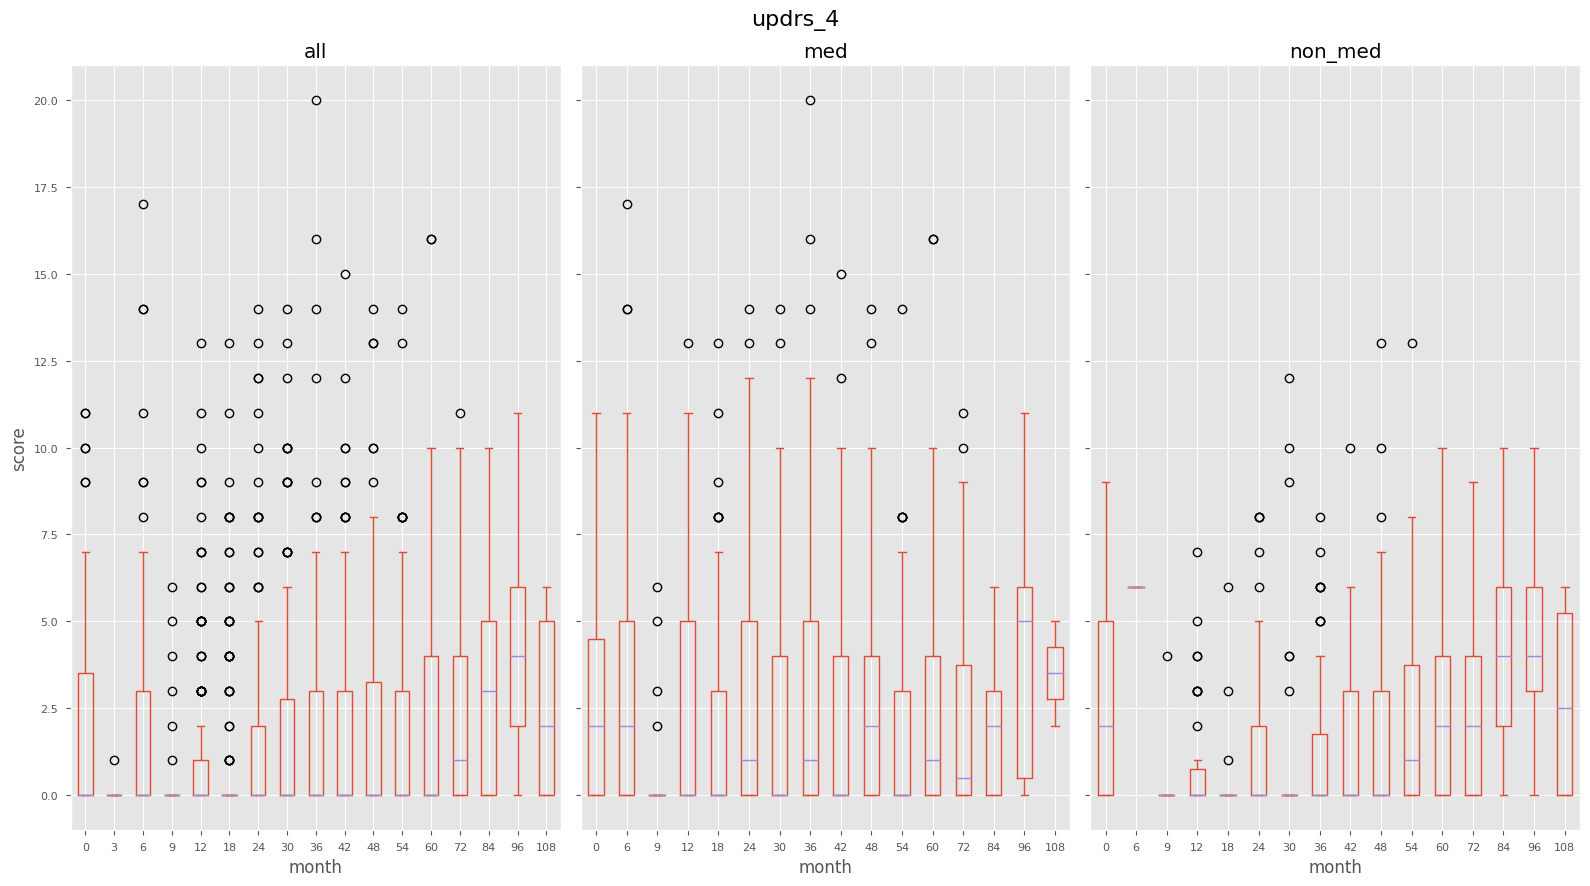

In [327]:
med = clinical[clinical.upd23b_clinical_state_on_medication == 'On']
non_med = clinical[(clinical.upd23b_clinical_state_on_medication == 'Off') |
                   (clinical.upd23b_clinical_state_on_medication == 'NaN')]

for i in range(1, 5):
    fig, axes = plt.subplots(1, 3, sharey='row', layout='tight') 
    fig.set_figheight(9)
    fig.set_figwidth(16)
    partition = {0: 'all', 1: 'med', 2: 'non_med'}

    for j, group_ in enumerate((clinical, med, non_med)):
        group_.plot.box(by='visit_month', column=[f'updrs_{i}'], ax=axes[j])

        axes[j].set_title(partition[j])
        axes[j].set_xlabel('month')
        axes[j].set_ylabel('score')

    plt.suptitle(f'updrs_{i}', fontsize=16)
    plt.show()

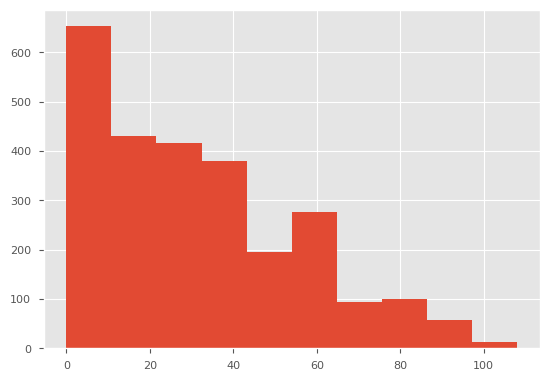

In [328]:
%matplotlib inline
plt.hist(clinical.visit_month, bins=10)
plt.show()

In [329]:
peptides = pd.read_csv('../amp_parkinson/train_peptides.csv')
peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [330]:
len(peptides.visit_id.unique())

1113

In [331]:
peptides.UniProt.value_counts()

P02787    51916
P02768    40900
P01024    35253
P02751    27370
P02649    23082
          ...  
Q6UX71      661
P01780      654
Q562R1      616
Q99832      606
Q99829      489
Name: UniProt, Length: 227, dtype: int64

In [332]:
peptides.PeptideAbundance.describe()

count    9.818340e+05
mean     6.428902e+05
std      3.377989e+06
min      1.099850e+01
25%      2.817425e+04
50%      7.430830e+04
75%      2.213388e+05
max      1.787520e+08
Name: PeptideAbundance, dtype: float64

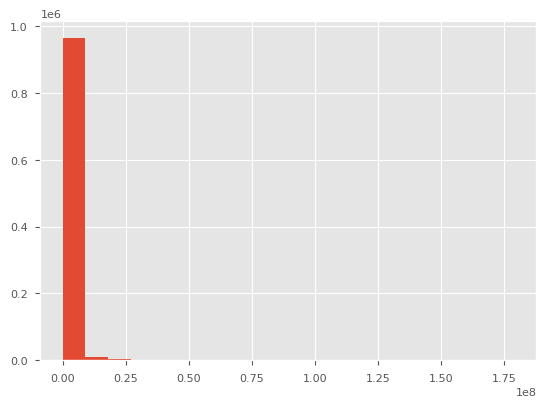

In [333]:
plt.hist(peptides.PeptideAbundance, bins=20)
plt.show()

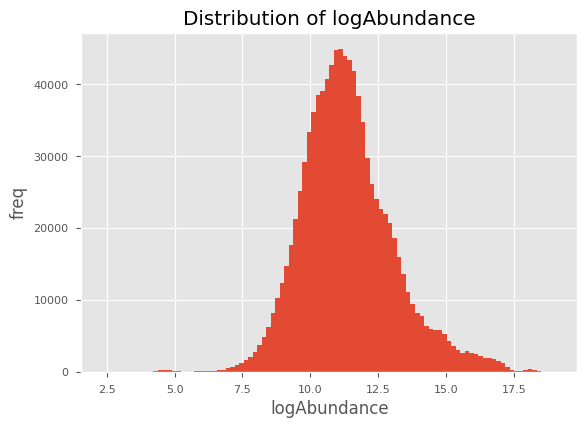

In [334]:
plt.hist(np.log(peptides.PeptideAbundance), bins=100)
plt.xlabel('logAbundance')
plt.ylabel('freq')
plt.title('Distribution of logAbundance')
plt.show()

In [335]:
peptides['logAbundance'] = np.log(peptides.PeptideAbundance)
peptides.logAbundance.describe()

count    981834.000000
mean         11.381449
std           1.703103
min           2.397759
25%          10.246164
50%          11.215978
75%          12.307450
max          19.001510
Name: logAbundance, dtype: float64

In [336]:
proteins = pd.read_csv('../amp_parkinson/train_proteins.csv')
proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [337]:
proteins.NPX.describe()

count    2.327410e+05
mean     2.712077e+06
std      2.224155e+07
min      8.460820e+01
25%      2.946440e+04
50%      1.135560e+05
75%      5.638940e+05
max      6.138510e+08
Name: NPX, dtype: float64

In [338]:
proteins['logNPX'] = np.log(proteins.NPX)

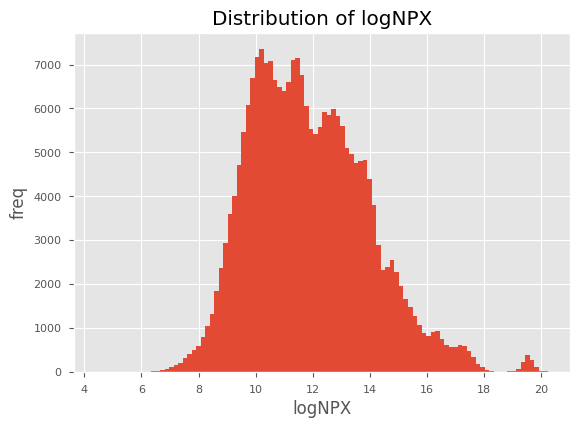

In [339]:
plt.hist(proteins.logNPX, bins=100)
plt.xlabel('logNPX')
plt.ylabel('freq')
plt.title('Distribution of logNPX')
plt.show()

3 peaks ???

In [340]:
proteins.logNPX.describe()

count    232741.000000
mean         11.878644
std           2.070049
min           4.438031
25%          10.290938
50%          11.640051
75%          13.242622
max          20.235263
Name: logNPX, dtype: float64

In [341]:
supl = pd.read_csv('../amp_parkinson/supplemental_clinical_data.csv', index_col=0)
supl

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
visit_id,,,,,,,
35_0,35,0,5.0,3.0,16.0,0.0,NaN
35_36,35,36,6.0,4.0,20.0,0.0,NaN
75_0,75,0,4.0,6.0,26.0,0.0,NaN
75_36,75,36,1.0,8.0,38.0,0.0,On
155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
65405_5,65405,5,NaN,NaN,57.0,NaN,NaN


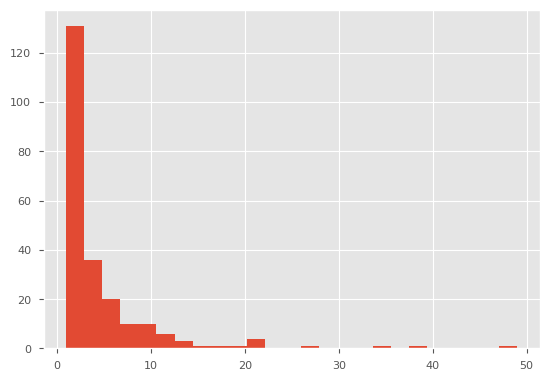

In [342]:
plt.hist(peptides.groupby(by='UniProt')['Peptide'].nunique(), bins=25)
plt.show()

In [343]:
peptides.groupby(by='UniProt')['Peptide'].nunique().describe()

count    227.000000
mean       4.264317
std        6.127026
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       49.000000
Name: Peptide, dtype: float64

In [344]:
proteins.UniProt.nunique(), peptides.Peptide.nunique()

(227, 968)

expand uniprot ??

In [345]:
peptides.Peptide.apply(lambda x: len(x)).describe()

count    981834.000000
mean         18.640605
std          10.990476
min           7.000000
25%          11.000000
50%          15.000000
75%          23.000000
max          87.000000
Name: Peptide, dtype: float64

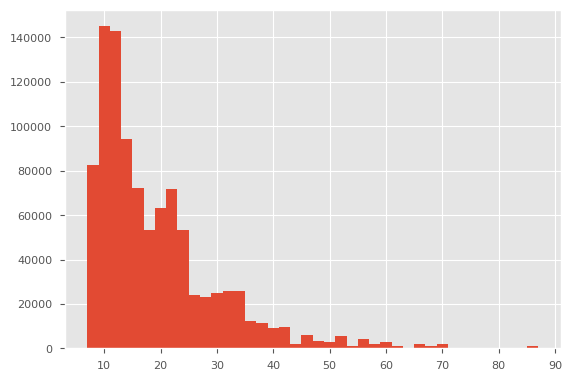

In [346]:
plt.hist(peptides.Peptide.apply(lambda x: len(x)), bins=40)
plt.show()

In [347]:
clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [348]:
clinical.upd23b_clinical_state_on_medication = clinical.upd23b_clinical_state_on_medication.fillna('Off')

In [349]:
on_med = clinical[clinical.upd23b_clinical_state_on_medication == 'On'].patient_id.unique()
off_med = clinical[clinical.upd23b_clinical_state_on_medication == 'Off'].patient_id.unique()


have_both = np.intersect1d(on_med, off_med)
len(have_both), len(on_med), len(off_med), len(clinical.patient_id.unique())

(131, 149, 230, 248)

In [350]:
patients_both = clinical[clinical.patient_id.isin(have_both)]
patients_both

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,Off
1,55_3,55,3,10.0,7.0,25.0,NaN,Off
2,55_6,55,6,8.0,10.0,34.0,NaN,Off
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


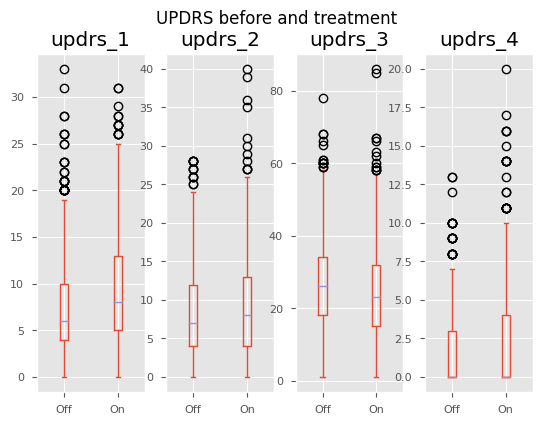

In [351]:
patients_both.plot.box(by='upd23b_clinical_state_on_medication', column=['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'])
plt.suptitle('UPDRS before and treatment')
plt.show()

In [352]:
patients_grouped = (patients_both.groupby(['patient_id', 'upd23b_clinical_state_on_medication'])
[['updrs_1', 'updrs_2', 'updrs_3']]
.agg('mean'))
patients_grouped

updrs_1    updrs_2  \
patient_id upd23b_clinical_state_on_medication                         
55         Off                                   9.333333   7.666667   
           On                                   13.600000  14.700000   
1517       Off                                  19.666667  17.000000   
           On                                   17.857143  10.857143   
3636       Off                                   9.111111   9.333333   
...                                                   ...        ...   
64669      On                                   16.000000  15.111111   
64674      Off                                   9.142857  11.214286   
           On                                   10.000000  15.500000   
65043      Off                                   4.428571   7.428571   
           On                                    2.000000   7.000000   

                                                  updrs_3  
patient_id upd23b_clinical_state_on_medication             
55         Off                                  24.666667  
           On                                   45.800000  
1517       Off                                  39.333333  
           On                                   29.714286  
3636       Off                                  11.222222  
...                                                   ...  
64669      On                                   32.111111  
64674      Off                                  34.428571  
           On                                   51.500000  
65043      Off                                  13.769231  
           On                                   11.000000  

[262 rows x 3 columns]

In [353]:
delta = pd.DataFrame(index=patients_both.patient_id.unique(), columns=['d_updrs_1', 'd_updrs_2', 'd_updrs_3'])

for pat_id in delta.index:
    for i in range(1, 4):
        delta.loc[pat_id, f'd_updrs_{i}'] = patients_grouped.loc[(pat_id, 'On'), f'updrs_{i}'] - patients_grouped.loc[(pat_id, 'Off'), f'updrs_{i}']

delta

,d_updrs_1,d_updrs_2,d_updrs_3
55,4.266667,7.033333,21.133333
1517,-1.809524,-6.142857,-9.619048
3636,-0.511111,-0.933333,-1.022222
3863,-6.25,-8.625,10.125
4923,-0.9,-0.5,-7.0
...,...,...,...
62792,1.0,1.111111,0.666667
63889,-1.142857,1.190476,-6.238095
64669,-0.666667,-1.722222,-6.055556
64674,0.857143,4.285714,17.071429


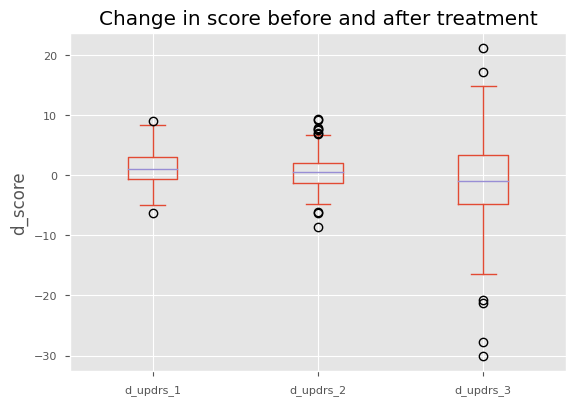

In [354]:
delta.plot.box(column=['d_updrs_1', 'd_updrs_2', 'd_updrs_3'])
plt.title('Change in score before and after treatment')
plt.ylabel('d_score')
plt.show()

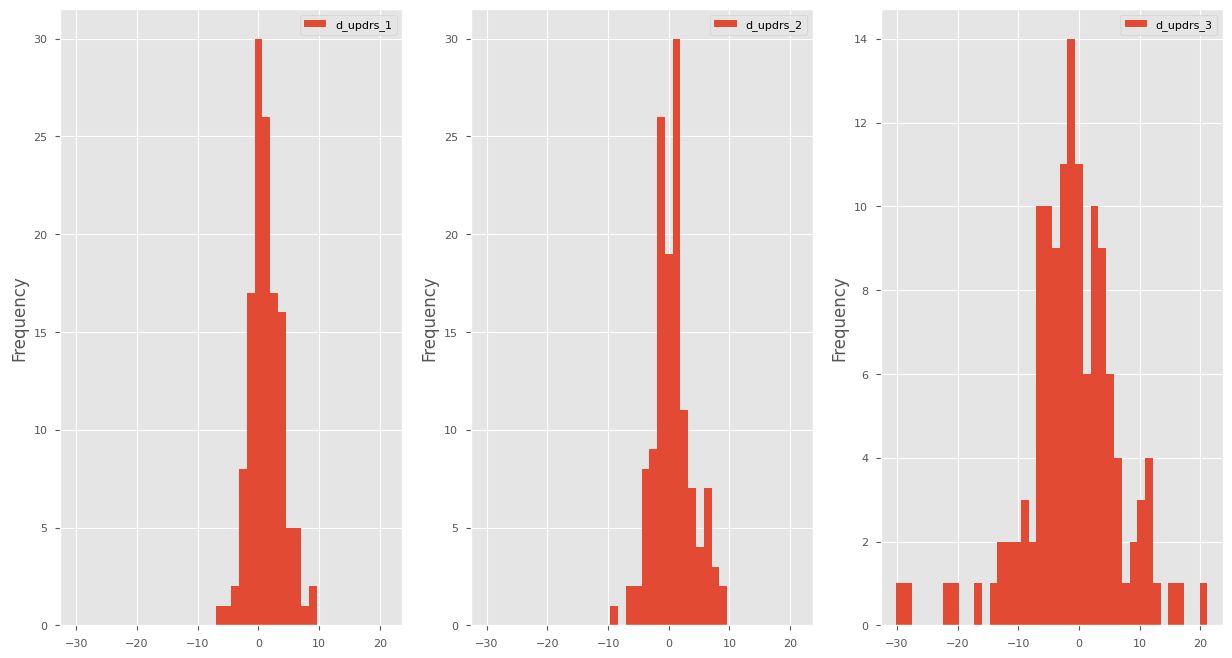

In [355]:
fig, axes = plt.subplots(1, 3)

fig.set_figwidth(15)
fig.set_figheight(8)
delta.plot.hist(column='d_updrs_1', bins=40, ax=axes[0])
delta.plot.hist(column='d_updrs_2', bins=40, ax=axes[1])
delta.plot.hist(column='d_updrs_3', bins=40, ax=axes[2])
plt.show()

In [356]:
proteins

,visit_id,visit_month,patient_id,UniProt,NPX,logNPX
0,55_0,0,55,O00391,11254.3,9.328506
1,55_0,0,55,O00533,732430.0,13.504123
2,55_0,0,55,O00584,39585.8,10.586226
3,55_0,0,55,O14498,41526.9,10.634097
4,55_0,0,55,O14773,31238.0,10.349391
...,...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8,10.217853
232737,58648_108,108,58648,Q9UHG2,369437.0,12.819736
232738,58648_108,108,58648,Q9UKV8,105830.0,11.569589
232739,58648_108,108,58648,Q9Y646,21257.6,9.964470


In [357]:
prots = proteins[['visit_id', 'UniProt', 'NPX']].pivot(index='visit_id', columns=['UniProt'], values='NPX')   
prots

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.90,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.10,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,9983.00,400290.0,24240.10,NaN,16943.50,6303.17,77493.6,46435.3,254247.0,138910.0,...,NaN,25690.60,NaN,6859.82,19106.7,121161.0,113872.0,14413.9,28225.50,8062.07
942_12,6757.32,360858.0,18367.60,14760.7,18603.40,1722.77,86847.4,37741.3,212132.0,100519.0,...,45742.3,33518.60,94049.7,13415.70,21324.7,234094.0,82410.4,19183.7,17804.10,12277.00
942_24,NaN,352722.0,22834.90,23393.1,16693.50,1487.91,114772.0,36095.7,185836.0,99183.5,...,180475.0,29770.60,95949.9,11344.40,23637.6,256654.0,76931.9,19168.2,19215.90,14625.60


In [358]:
len(prots), len(clinical.visit_id.unique())

(1113, 2615)

In [359]:
peptides.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
       'PeptideAbundance', 'logAbundance'],
      dtype='object')

In [360]:
pepts = peptides[['visit_id', 'Peptide', 'PeptideAbundance']].pivot(index='visit_id', columns=['Peptide'], values='PeptideAbundance')
pepts   

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


Blood work is done every second visit on avg

In [361]:
merged = clinical.merge(prots, how='left', on='visit_id')
merged[:30]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
0,55_0,55,0,10.0,6.0,15.0,NaN,Off,11254.30,732430.0,...,365475.0,35528.0,97005.6,23122.5,60912.6,408698.0,NaN,29758.8,23833.7,18953.5
1,55_3,55,3,10.0,7.0,25.0,NaN,Off,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,Off,13163.60,630465.0,...,405676.0,30332.6,109174.0,23499.8,51655.8,369870.0,NaN,22935.2,17722.5,16642.7
3,55_9,55,9,8.0,9.0,30.0,0.0,On,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55_12,55,12,10.0,10.0,41.0,0.0,On,15257.60,815083.0,...,303953.0,43026.2,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9
5,55_18,55,18,7.0,13.0,38.0,0.0,On,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,55_24,55,24,16.0,9.0,49.0,0.0,On,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,55_30,55,30,14.0,13.0,49.0,0.0,On,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,55_36,55,36,17.0,18.0,51.0,0.0,On,13530.80,753832.0,...,303597.0,48188.4,109794.0,23930.6,70223.5,377550.0,74976.1,31732.6,22186.5,21717.1
9,55_42,55,42,12.0,20.0,41.0,0.0,On,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
merged = merged.groupby('patient_id').fillna(method='ffill')
merged

,visit_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,O00584,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
0,55_0,0,10.0,6.0,15.0,NaN,Off,11254.3,732430.0,39585.8,...,365475.0,35528.0,97005.6,23122.5,60912.6,408698.0,NaN,29758.8,23833.7,18953.5
1,55_3,3,10.0,7.0,25.0,NaN,Off,11254.3,732430.0,39585.8,...,365475.0,35528.0,97005.6,23122.5,60912.6,408698.0,NaN,29758.8,23833.7,18953.5
2,55_6,6,8.0,10.0,34.0,NaN,Off,13163.6,630465.0,35220.8,...,405676.0,30332.6,109174.0,23499.8,51655.8,369870.0,NaN,22935.2,17722.5,16642.7
3,55_9,9,8.0,9.0,30.0,0.0,On,13163.6,630465.0,35220.8,...,405676.0,30332.6,109174.0,23499.8,51655.8,369870.0,NaN,22935.2,17722.5,16642.7
4,55_12,12,10.0,10.0,41.0,0.0,On,15257.6,815083.0,41650.9,...,303953.0,43026.2,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,65043_48,48,7.0,6.0,13.0,0.0,Off,10589.6,902434.0,44890.8,...,223136.0,21659.9,116470.0,14073.3,48796.4,320821.0,39046.7,NaN,20198.8,39535.0
2611,65043_54,54,4.0,8.0,11.0,1.0,Off,10589.6,902434.0,44890.8,...,223136.0,21659.9,116470.0,14073.3,48796.4,320821.0,39046.7,NaN,20198.8,39535.0
2612,65043_60,60,6.0,6.0,16.0,1.0,Off,10589.6,902434.0,44890.8,...,223136.0,21659.9,116470.0,14073.3,48796.4,320821.0,39046.7,NaN,20198.8,39535.0
2613,65043_72,72,3.0,9.0,14.0,1.0,Off,10589.6,902434.0,44890.8,...,223136.0,21659.9,116470.0,14073.3,48796.4,320821.0,39046.7,NaN,20198.8,39535.0


In [363]:
merged = merged.fillna(1)

In [364]:
merged.shape, merged.dropna().shape

((2615, 234), (2615, 234))

In [365]:
merged['patient_id'] = merged.visit_id.apply(lambda x: int(str(x).split('_')[0]))
merged

,visit_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,O00584,...,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7,patient_id
0,55_0,0,10.0,6.0,15.0,1.0,Off,11254.3,732430.0,39585.8,...,35528.0,97005.6,23122.5,60912.6,408698.0,1.0,29758.8,23833.7,18953.5,55
1,55_3,3,10.0,7.0,25.0,1.0,Off,11254.3,732430.0,39585.8,...,35528.0,97005.6,23122.5,60912.6,408698.0,1.0,29758.8,23833.7,18953.5,55
2,55_6,6,8.0,10.0,34.0,1.0,Off,13163.6,630465.0,35220.8,...,30332.6,109174.0,23499.8,51655.8,369870.0,1.0,22935.2,17722.5,16642.7,55
3,55_9,9,8.0,9.0,30.0,0.0,On,13163.6,630465.0,35220.8,...,30332.6,109174.0,23499.8,51655.8,369870.0,1.0,22935.2,17722.5,16642.7,55
4,55_12,12,10.0,10.0,41.0,0.0,On,15257.6,815083.0,41650.9,...,43026.2,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,65043_48,48,7.0,6.0,13.0,0.0,Off,10589.6,902434.0,44890.8,...,21659.9,116470.0,14073.3,48796.4,320821.0,39046.7,1.0,20198.8,39535.0,65043
2611,65043_54,54,4.0,8.0,11.0,1.0,Off,10589.6,902434.0,44890.8,...,21659.9,116470.0,14073.3,48796.4,320821.0,39046.7,1.0,20198.8,39535.0,65043
2612,65043_60,60,6.0,6.0,16.0,1.0,Off,10589.6,902434.0,44890.8,...,21659.9,116470.0,14073.3,48796.4,320821.0,39046.7,1.0,20198.8,39535.0,65043
2613,65043_72,72,3.0,9.0,14.0,1.0,Off,10589.6,902434.0,44890.8,...,21659.9,116470.0,14073.3,48796.4,320821.0,39046.7,1.0,20198.8,39535.0,65043


In [366]:
stats = merged.describe()
stats

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,O00391,O00533,O00584,O14498,O14773,...,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7,patient_id
count,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2.615000e+03,2615.000000,2615.000000,2615.000000,...,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000
mean,31.190822,7.110516,6.742639,19.471128,1.520459,9064.753096,4.877689e+05,25758.177774,25152.561805,16215.793365,...,33187.069866,98858.432428,13666.012134,34179.045583,220175.505774,63208.195457,14912.887732,18533.900050,19116.181717,32651.743786
std,25.199053,5.524899,6.322734,14.970790,2.403187,5355.888560,2.556836e+05,12110.136687,10869.652684,8216.051108,...,20549.162481,41520.405372,6254.814405,15038.733512,113182.459771,33477.267365,10373.458678,7524.288593,12006.208775,18535.758700
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000
25%,10.500000,3.000000,1.000000,6.000000,0.000000,7128.885000,3.164000e+05,18891.400000,19303.100000,11429.000000,...,17876.400000,86125.200000,10814.500000,25553.200000,145282.000000,46479.850000,1.000000,14633.050000,11249.550000,16574.000000
50%,24.000000,6.000000,5.000000,19.000000,1.000000,10500.200000,4.656610e+05,26315.200000,25389.300000,16277.800000,...,31650.700000,106318.000000,14277.600000,34184.600000,209348.000000,64204.700000,16347.900000,18734.800000,17721.000000,29417.000000
75%,48.000000,10.000000,10.000000,29.000000,1.000000,12762.450000,6.459575e+05,33676.900000,31693.350000,21353.400000,...,46784.600000,122793.000000,17511.200000,43516.400000,282706.000000,81810.900000,22066.500000,22702.400000,25754.200000,50611.000000
max,108.000000,33.000000,40.000000,86.000000,20.000000,21361.800000,1.806980e+06,66252.400000,65347.900000,49695.600000,...,128338.000000,209158.000000,39060.600000,84868.900000,718141.000000,226139.000000,68511.500000,48743.400000,122699.000000,65043.000000


In [367]:
prot_stats = stats.iloc[:, 5:].T
prot_stats

,count,mean,std,min,25%,50%,75%,max
O00391,2615.0,9064.753096,5355.888560,1.0,7128.885,10500.2,12762.45,21361.8
O00533,2615.0,487768.857744,255683.622380,1.0,316400.000,465661.0,645957.50,1806980.0
O00584,2615.0,25758.177774,12110.136687,1.0,18891.400,26315.2,33676.90,66252.4
O14498,2615.0,25152.561805,10869.652684,1.0,19303.100,25389.3,31693.35,65347.9
O14773,2615.0,16215.793365,8216.051108,1.0,11429.000,16277.8,21353.40,49695.6
...,...,...,...,...,...,...,...,...
Q9UKV8,2615.0,63208.195457,33477.267365,1.0,46479.850,64204.7,81810.90,226139.0
Q9UNU6,2615.0,14912.887732,10373.458678,1.0,1.000,16347.9,22066.50,68511.5
Q9Y646,2615.0,18533.900050,7524.288593,1.0,14633.050,18734.8,22702.40,48743.4
Q9Y6R7,2615.0,19116.181717,12006.208775,1.0,11249.550,17721.0,25754.20,122699.0


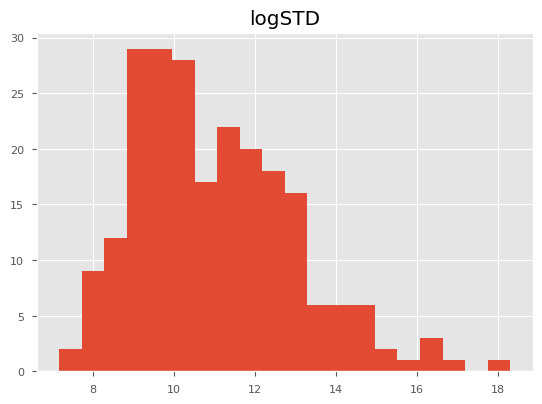

In [368]:
plt.hist(np.log(prot_stats['std']), bins=20)
plt.title('logSTD')
plt.show()

In [369]:
merged.upd23b_clinical_state_on_medication = merged.upd23b_clinical_state_on_medication.apply(lambda x: 1 if x == 'On' else 0)

In [370]:
merged = merged.rename({'upd23b_clinical_state_on_medication': 'on_med'}, axis=1)

In [371]:
merged.isin([0]).sum()[:20]

visit_id          0
visit_month     248
updrs_1         145
updrs_2         502
updrs_3         324
updrs_4        1002
on_med         1840
O00391            0
O00533            0
O00584            0
O14498            0
O14773            0
O14791            0
O15240            0
O15394            0
O43505            0
O60888            0
O75144            0
O75326            0
O94919            0
dtype: int64

In [372]:
from sklearn.feature_selection import mutual_info_classif

X = merged.drop(['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'visit_id', 'patient_id'], axis=1)

y1 = merged.updrs_1
y2 = merged.updrs_2
y3 = merged.updrs_3
y4 = merged.updrs_4

up_1_info = pd.Series(mutual_info_classif(X=X, y=y1), index = X.columns).sort_values(ascending=False)
up_2_info = pd.Series(mutual_info_classif(X=X, y=y2), index = X.columns).sort_values(ascending=False)
up_3_info = pd.Series(mutual_info_classif(X=X, y=y3), index = X.columns).sort_values(ascending=False)
up_4_info = pd.Series(mutual_info_classif(X=X, y=y4), index = X.columns).sort_values(ascending=False)

In [373]:
cols = up_1_info.index.tolist()[2:]

In [374]:
{col[0] for col in cols}

{'O', 'P', 'Q', 'o', 'v'}

In [375]:
len([col for col in cols if col[0] == 'P']), len([col for col in cols if col[0] == 'Q']), len([col for col in cols if col[0] == 'O']), len(cols)

(160, 52, 13, 227)

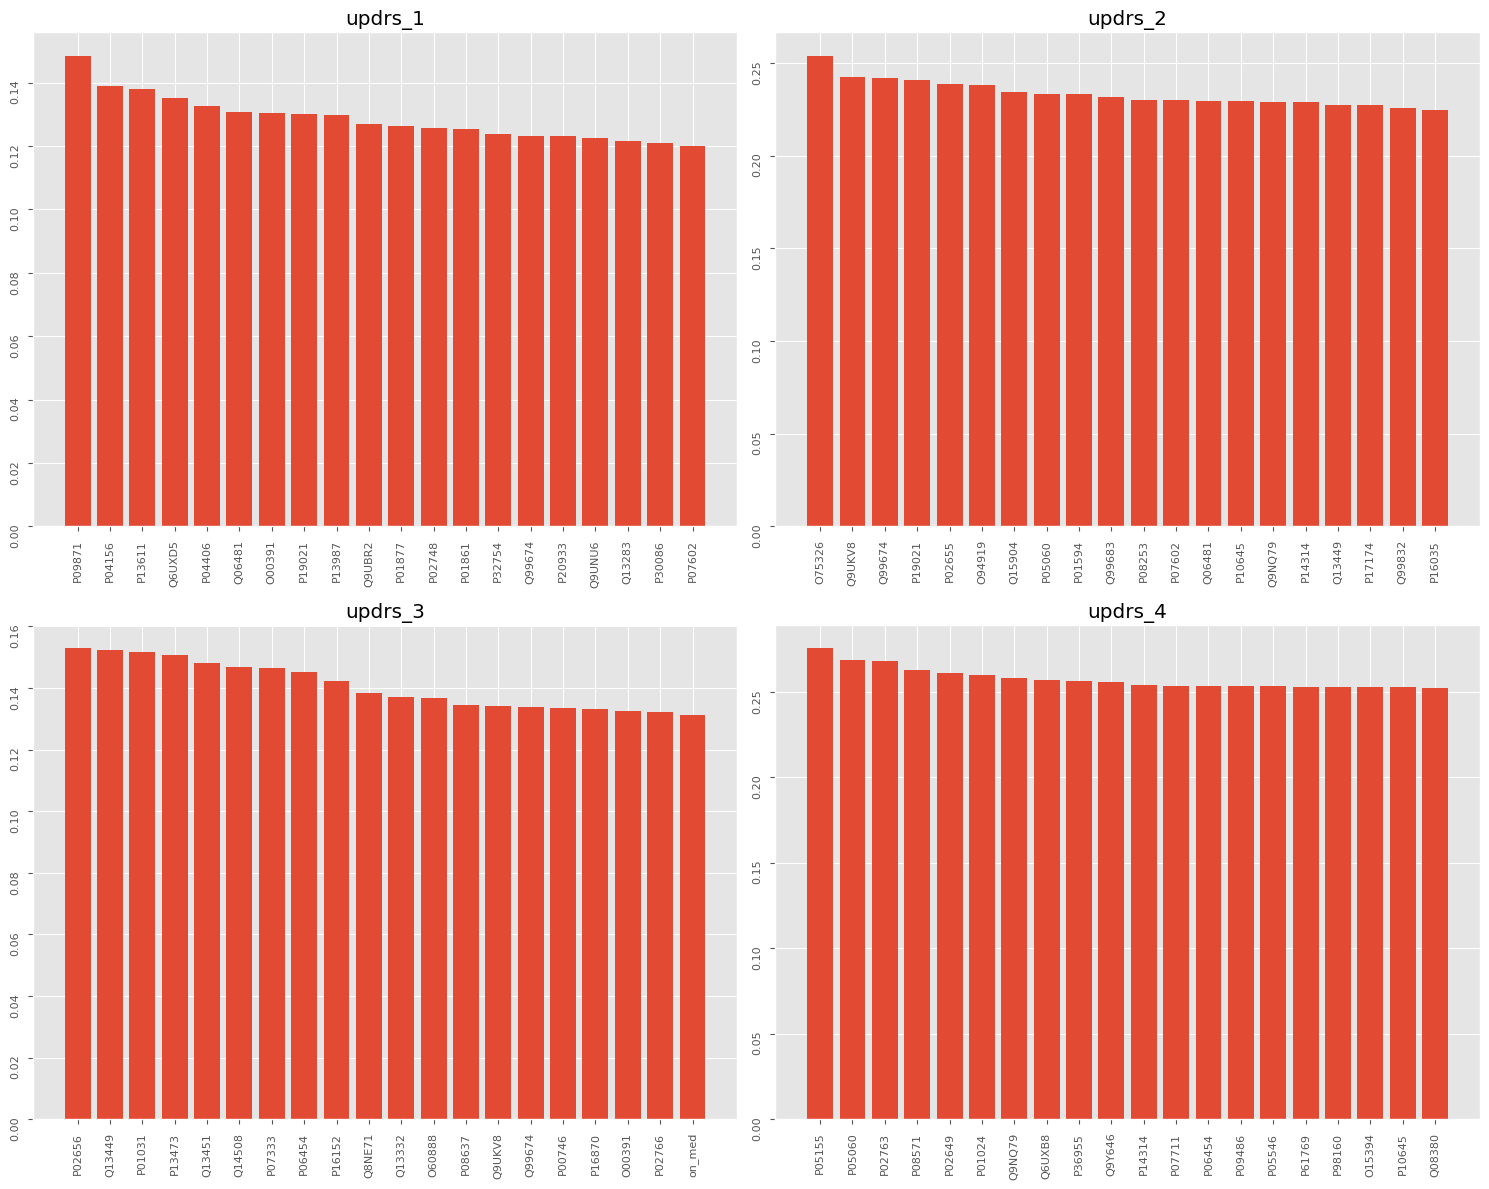

In [376]:
fig, ax = plt.subplots(2, 2, layout='tight')
fig.set_figheight(12)
fig.set_figwidth(15)
for index, up_info in enumerate([up_1_info, up_2_info, up_3_info, up_4_info]):
    i, j = index // 2, index % 2
    ax[i, j].bar(x=up_info[:20].index, height=up_info[:20])
    ax[i, j].set_title(f'updrs_{index + 1}')
    ax[i, j].tick_params(labelrotation=90)

plt.show()

Group by first letter of UniProt name

In [377]:
for p_family in ['P', 'Q', 'O']:
    fam_cols = [col for col in cols if col[0] == p_family]
    merged[f'{p_family}_sum'] = merged[fam_cols].sum(axis=1)

In [378]:
merged.Q_sum.dropna()

0       13998353.63
1       13998353.63
2       13531437.87
3       13531437.87
4       14348725.33
           ...     
2610    13404773.24
2611    13404773.24
2612    13404773.24
2613    13404773.24
2614    13404773.24
Name: Q_sum, Length: 2615, dtype: float64

In [379]:
X_sums = merged[[f'{fam}_sum' for fam in ['P', 'Q', 'O']]]

up_1_sums = pd.Series(mutual_info_classif(X=X_sums, y=y1), index = X_sums.columns).sort_values(ascending=False)

In [380]:
up_1_sums

Q_sum    0.100754
P_sum    0.094720
O_sum    0.082009
dtype: float64

In [382]:
merged = pd.merge(merged, pepts, how='left', on='visit_id').groupby('patient_id').fillna(method='ffill')
merged.columns[235:]

Index(['Q_sum', 'O_sum', 'AADDTWEPFASGK',
       'AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K',
       'AAFTEC(UniMod_4)C(UniMod_4)QAADK', 'AANEVSSADVK',
       'AATGEC(UniMod_4)TATVGKR', 'AATVGSLAGQPLQER', 'AAVYHHFISDGVR',
       'ADDKETC(UniMod_4)FAEEGK',
       ...
       'YSLTYIYTGLSK', 'YTTEIIK', 'YVGGQEHFAHLLILR',
       'YVM(UniMod_35)LPVADQDQC(UniMod_4)IR', 'YVMLPVADQDQC(UniMod_4)IR',
       'YVNKEIQNAVNGVK', 'YWGVASFLQK', 'YYC(UniMod_4)FQGNQFLR', 'YYTYLIMNK',
       'YYWGGQYTWDMAK'],
      dtype='object', length=970)

In [384]:
merged = merged.fillna(1)

In [ ]:
col_names = merged.columns
col_names[239]

'AAFTEC(UniMod_4)C(UniMod_4)QAADK'

In [ ]:
import re

[re.sub(r'\(UniMod_\d+\)', '', name) for name in col_names]

In [385]:
merged_c = merged.copy()

merged_c.columns = [re.sub(r'\(UniMod_\d+\)', '', name) for name in col_names]
merged_c

,visit_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,on_med,O00391,O00533,O00584,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVMLPVADQDQCIR,YVMLPVADQDQCIR,YVNKEIQNAVNGVK,YWGVASFLQK,YYCFQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,55_0,0,10.0,6.0,15.0,1.0,0,11254.3,732430.0,39585.8,...,201158.0,16492.3,3810270.0,106894.0,580667.0,131155.0,165851.0,437305.0,46289.2,14898.4
1,55_3,3,10.0,7.0,25.0,1.0,0,11254.3,732430.0,39585.8,...,201158.0,16492.3,3810270.0,106894.0,580667.0,131155.0,165851.0,437305.0,46289.2,14898.4
2,55_6,6,8.0,10.0,34.0,1.0,0,13163.6,630465.0,35220.8,...,171079.0,13198.8,4119520.0,113385.0,514861.0,103512.0,144607.0,457891.0,40047.7,20703.9
3,55_9,9,8.0,9.0,30.0,0.0,1,13163.6,630465.0,35220.8,...,171079.0,13198.8,4119520.0,113385.0,514861.0,103512.0,144607.0,457891.0,40047.7,20703.9
4,55_12,12,10.0,10.0,41.0,0.0,1,15257.6,815083.0,41650.9,...,231772.0,17873.8,5474140.0,116286.0,711815.0,136943.0,181763.0,452253.0,54725.1,21841.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,65043_48,48,7.0,6.0,13.0,0.0,0,10589.6,902434.0,44890.8,...,233567.0,14478.3,3185530.0,48793.0,501159.0,133992.0,170146.0,359045.0,45780.0,17370.6
2611,65043_54,54,4.0,8.0,11.0,1.0,0,10589.6,902434.0,44890.8,...,233567.0,14478.3,3185530.0,48793.0,501159.0,133992.0,170146.0,359045.0,45780.0,17370.6
2612,65043_60,60,6.0,6.0,16.0,1.0,0,10589.6,902434.0,44890.8,...,233567.0,14478.3,3185530.0,48793.0,501159.0,133992.0,170146.0,359045.0,45780.0,17370.6
2613,65043_72,72,3.0,9.0,14.0,1.0,0,10589.6,902434.0,44890.8,...,233567.0,14478.3,3185530.0,48793.0,501159.0,133992.0,170146.0,359045.0,45780.0,17370.6


In [393]:
merged_c.to_csv('../data/2604-prots_pepts.csv')

In [397]:
from sklearn.feature_selection import mutual_info_classif

X = merged_c.drop(['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'visit_id'], axis=1)

y1 = merged_c.updrs_1
y2 = merged_c.updrs_2
y3 = merged_c.updrs_3
y4 = merged_c.updrs_4

up_1_info = pd.Series(mutual_info_classif(X=X, y=y1), index = X.columns).sort_values(ascending=False)
up_2_info = pd.Series(mutual_info_classif(X=X, y=y2), index = X.columns).sort_values(ascending=False)
up_3_info = pd.Series(mutual_info_classif(X=X, y=y3), index = X.columns).sort_values(ascending=False)
up_4_info = pd.Series(mutual_info_classif(X=X, y=y4), index = X.columns).sort_values(ascending=False)

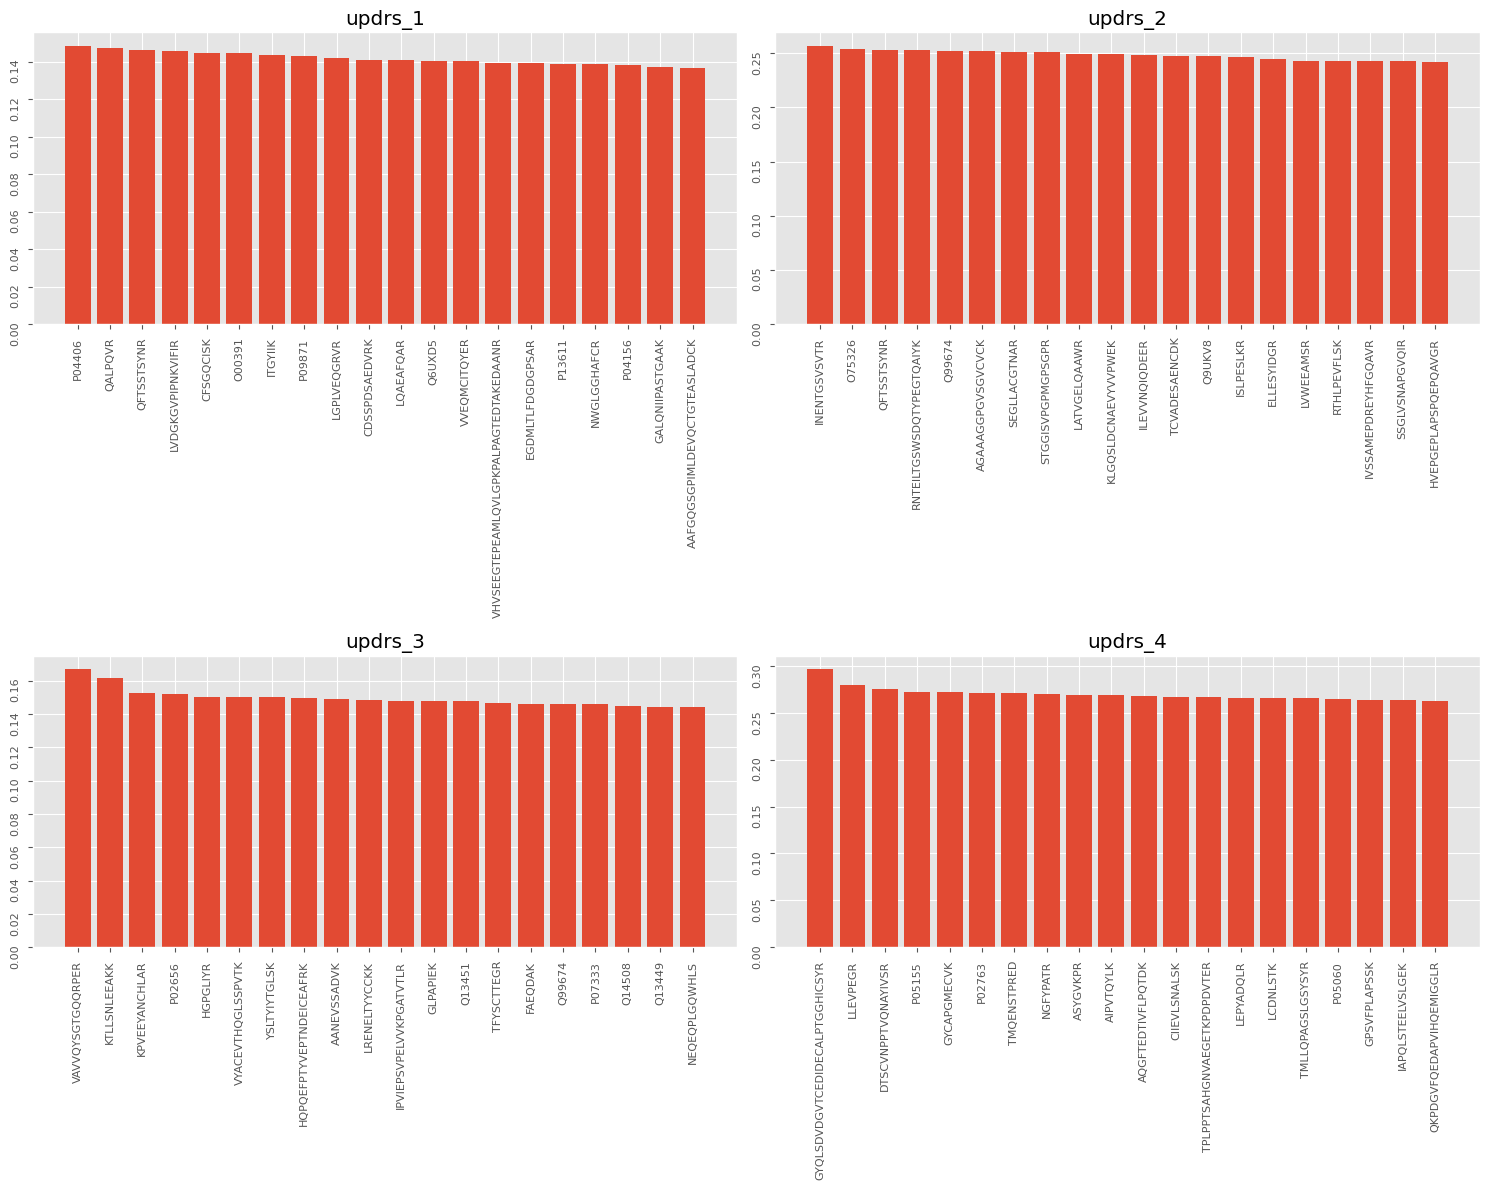

In [398]:
fig, ax = plt.subplots(2, 2, layout='tight')
fig.set_figheight(12)
fig.set_figwidth(15)
for index, up_info in enumerate([up_1_info, up_2_info, up_3_info, up_4_info]):
    i, j = index // 2, index % 2
    ax[i, j].bar(x=up_info[:20].index, height=up_info[:20])
    ax[i, j].set_title(f'updrs_{index + 1}')
    ax[i, j].tick_params(labelrotation=90)

plt.show()

[TODO] different cols for different scores